### Semi Deviation, VAR and CVAR

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import edhec_risk_kit as erk
%matplotlib inline

In [2]:
hfi = erk.get_hfi_returns()

## Semideviation


In [4]:
hfi.std(ddof = 0) # ddof means devis devition  is zero

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

### spread or deviation is above mean, which is positive, but we don't need that as it is +ve, we are concerned about the deviation below mean(0). We can get that by subsetting hfi < 0

In [6]:
hfi[hfi<0].std(ddof = 0) 

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### Added a function called semideviation into the module edhec_risk_kit.py, and called the function

In [7]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### VaR i.e. value at risk and CVaR
### - historic VaR
### - parametric VaR specifically gaussian VaR
### - modified or cornish-fisher VaR

### historic VaR: looking at the data from earlier and then for example find the deviation below mean at 5% in a given period of time

In [8]:
import numpy as np


In [9]:
np.percentile(hfi, 5,axis = 0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

### by looking at the result we got the first column is the Convertible Arbitrage is below 1.5% in a given time, and so on

### added another function as VaR historic to get the labels like in pandas rather than a array form in numpy

###  Got +ve result as the results even if they are -Ve they are represented as +ve, to get this in our code in edehec....py we put a - beforenp....

In [10]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

### If we want to import partial module we can do so with ..

In [11]:
from scipy.stats import norm

### we are calling ppf on norm, the ppf is percent point function, to find out how far the standerd deviation is from mean which is z score

In [13]:
z = norm.ppf(.05)
z

-1.6448536269514729

In [15]:
-(hfi.mean()+ z*hfi.std(ddof = 0)) # value at risk at 5% level, showing in +ve result

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

### created a function as var_gaussian in our module, now we can use it to get same result as such..

In [16]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

### cornish-fisher VaR is that we know that the gaussian is not normal,and kurtosis is not 3, there is skewness which we are ignoring,so lets calculate that.. To do so added in the var_gaussian function an attribute called modified, and then did the calculation using z and kurtosis formula

<AxesSubplot:title={'center':'EDHEC hedge funds indices: VaR'}>

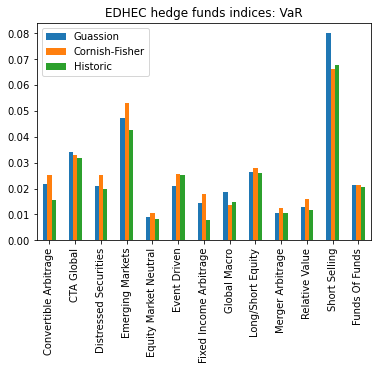

In [17]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified = True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis = 1)  # axis = 1 means read from left tio right
comparison.columns = ['Guassion','Cornish-Fisher','Historic']
comparison.plot.bar(title = 'EDHEC hedge funds indices: VaR')

#### Beyond VaR aka CVaR i.e. conditional value at risk, which is nothing but average of all those VaRs which are below the given value say5%, and then average that and we get the conditional VaR

In [19]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

### The above result says that on the 5% loss, the average let's say for Convertible Arbitrage  is 3% in that month